# Querying data from the USGS National Water Information System


The USGS National Water Information System (NWIS) provides access to surface-water data at approximately 8,500 sites. The data are served online—most in near realtime—to meet many diverse needs. For additional information regarding NWIS, visit the [USGS website](https://waterdata.usgs.gov/nwis).

In [1]:
from HydroGenerate.hydropower_potential import calculate_hp_potential
import pandas as pd
import matplotlib.pyplot as plt

##### Use streamflow data from a USGS stream gauge. 

The USGS has a Python package (**_dataretrieval_**) designed to simplify the process of loading hydrologic data into the Python environment. **_dataretrieval_** can be pip installed into a Python environment. The example code shows how to donwload data using **_dataretrieval_** and format it for hydropower potential evaluation in **_HydroGenerate_**. The example used, and additional information, is avlaiable as a [HydroShare Resource](http://www.hydroshare.org/resource/c97c32ecf59b4dff90ef013030c54264). Information about **_dataretrieval_** is avaliable directly on the [USGS GitHUb Repository](https://github.com/DOI-USGS/dataretrieval-python).

In [2]:
# Install dataretrieval, if it doesn't exist in Python environment, using: 
# !pip install dataretrieval

In [3]:
# import data retrieval
from dataretrieval import nwis

In [4]:
# Set the parameters needed to retrieve data
siteNumber = "10109000" # LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT
parameterCode = "00060" # Discharge
startDate = "2010-01-01"
endDate = "2020-12-31"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 

In [5]:
# convert to pandas dataframe
flow = pd.DataFrame(dailyStreamflow[0])
flow.head()

,site_no,00060_Mean,00060_Mean_cd
datetime,,,
2010-01-01 00:00:00+00:00,10109000,108.0,A
2010-01-02 00:00:00+00:00,10109000,107.0,A
2010-01-03 00:00:00+00:00,10109000,106.0,A
2010-01-04 00:00:00+00:00,10109000,102.0,A
2010-01-05 00:00:00+00:00,10109000,105.0,A


In [6]:
# Use the streamflow data from a USGS stream gauge - Cont.
# The flow data for this example was created in the previous step. 
head = 100 # ft
power = None
penstock_length = 120 # ft
hp_type = 'Diversion' 
flow_column = '00060_Mean'  # name of the column containing the flow data

hp = calculate_hp_potential(flow= flow, rated_power= power, head= head,
                            penstock_headloss_calculation= True,
                           hydropower_type= hp_type, penstock_length= penstock_length,
                           flow_column= flow_column, annual_caclulation= True)

# Explore output
print('Design flow (cfs):', hp.design_flow)
print('Head_loss at design flow (ft):', round(hp.penstock_design_headloss, 2))
print('Turbine type:', hp.turbine_type)
print('Rated Power (Kw):', round(hp.rated_power, 2))
print('Net head (ft):', round(hp.net_head, 2))
print('Generator Efficiency:',hp.generator_efficiency)
print('Head Loss method:',hp.penstock_headloss_method)
print('Penstock length (ft):', hp.penstock_length)
print('Penstock diameter (ft):', round(hp.penstock_diameter,2))
print('Runner diameter (ft):', round(hp.runner_diameter,2))

print('\nPandas dataframe output: \n', hp.dataframe_output)
print('Annual output: \n', hp.annual_dataframe_output)

Design flow (cfs): 200.0
Head_loss at design flow (ft): 8.94
Turbine type: Crossflow
Rated Power (Kw): 1193.76
Net head (ft): 91.06
Generator Efficiency: 0.98
Head Loss method: Darcy-Weisbach
Penstock length (ft): 120.0
Penstock diameter (ft): 3.31


TypeError: type NoneType doesn't define __round__ method

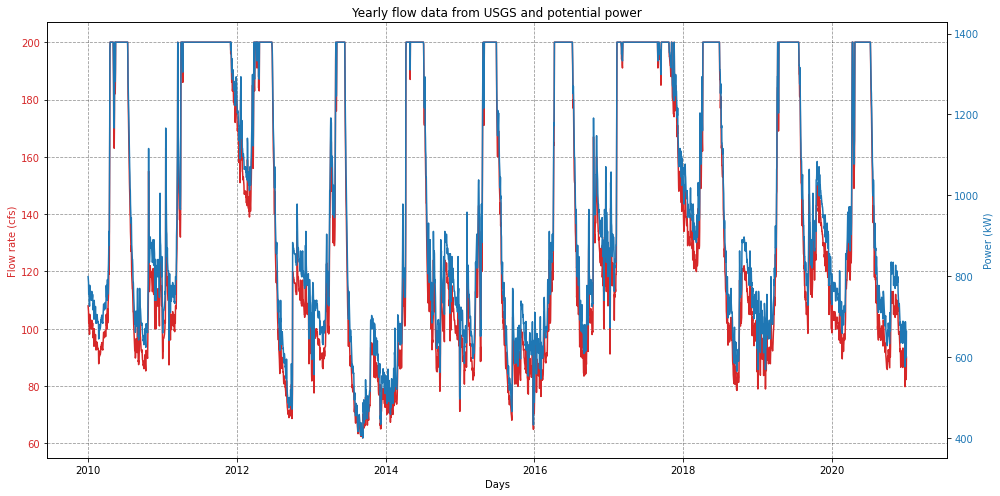

In [7]:
# Plot results
# Columns:  discharge_cfs   site_id     power_kW  efficiency   energy_kWh

plt.rcParams['figure.figsize'] = [14, 7]

df = hp.dataframe_output.copy()
fig, ax1 = plt.subplots()


color_plot = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cfs)', color=color_plot)
ax1.plot(df['turbine_flow_cfs'], label="Flow rate", color=color_plot)
ax1.tick_params(axis='y', labelcolor=color_plot)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color_plot2 = 'tab:blue'
ax2.set_ylabel('Power (kW)', color=color_plot2)  # we already handled the x-label with ax1
ax2.plot(df['power_kW'],'b-',label="Power", color=color_plot2)
ax2.tick_params(axis='y', labelcolor=color_plot2)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Yearly flow data from USGS and potential power")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()